# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saleaula
City not found. Skipping...
Processing Record 2 of Set 1 | barsovo
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mwingi
Processing Record 10 of Set 1 | swellendam
Processing Record 11 of Set 1 | bonavista
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | harper
Processing R

Processing Record 38 of Set 4 | ardakan
Processing Record 39 of Set 4 | toyooka
Processing Record 40 of Set 4 | pindi bhattian
Processing Record 41 of Set 4 | kieta
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | padilla
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | yuancheng
Processing Record 46 of Set 4 | ibotirama
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | muskegon
Processing Record 49 of Set 4 | shingu
Processing Record 0 of Set 5 | urucara
Processing Record 1 of Set 5 | sumbawa
City not found. Skipping...
Processing Record 2 of Set 5 | nador
Processing Record 3 of Set 5 | salalah
Processing Record 4 of Set 5 | noumea
Processing Record 5 of Set 5 | srednekolymsk
Processing Record 6 of Set 5 | padang
Processing Record 7 of Set 5 | bud
Processing Record 8 of Set 5 | alekseyevka
Processing Record 9 of Set 5 | lata
Processing Record 10 of Set 5 | ipu
Processing Record 11 of Set 5 | sao borja
Process

Processing Record 27 of Set 8 | urumqi
Processing Record 28 of Set 8 | masaka
Processing Record 29 of Set 8 | hualmay
Processing Record 30 of Set 8 | robat karim
Processing Record 31 of Set 8 | knysna
Processing Record 32 of Set 8 | peniche
Processing Record 33 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 34 of Set 8 | haimen
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | bairiki
Processing Record 37 of Set 8 | belmonte
Processing Record 38 of Set 8 | karaul
City not found. Skipping...
Processing Record 39 of Set 8 | lulea
Processing Record 40 of Set 8 | burnie
Processing Record 41 of Set 8 | wajima
Processing Record 42 of Set 8 | valkeakoski
Processing Record 43 of Set 8 | poum
Processing Record 44 of Set 8 | beaverlodge
Processing Record 45 of Set 8 | staritsa
Processing Record 46 of Set 8 | nikolskoye
Processing Record 47 of Set 8 | aksha
Processing Record 48 of Set 8 | santa maria
Processing Record 49 of Set 8 | jaleswar
Process

Processing Record 13 of Set 12 | sambava
Processing Record 14 of Set 12 | djambala
Processing Record 15 of Set 12 | grande prairie
Processing Record 16 of Set 12 | bathsheba
Processing Record 17 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 18 of Set 12 | yar-sale
Processing Record 19 of Set 12 | vastervik
City not found. Skipping...
Processing Record 20 of Set 12 | cayenne
Processing Record 21 of Set 12 | lugovoy
Processing Record 22 of Set 12 | daru
Processing Record 23 of Set 12 | vanavara
Processing Record 24 of Set 12 | kumta
Processing Record 25 of Set 12 | sinnamary
Processing Record 26 of Set 12 | grand-santi
Processing Record 27 of Set 12 | herrin
Processing Record 28 of Set 12 | sawakin
Processing Record 29 of Set 12 | havelock
Processing Record 30 of Set 12 | puerto palomas
Processing Record 31 of Set 12 | ulaangom
Processing Record 32 of Set 12 | ferme-neuve
Processing Record 33 of Set 12 | ramgarh
Processing Record 34 of Set 12 | languyan
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barsovo,61.1667,73.1667,-3.87,80,6,9.04,RU,1680836834
1,bredasdorp,-34.5322,20.0403,62.42,85,37,11.36,ZA,1680836834
2,hermanus,-34.4187,19.2345,64.80,88,29,14.43,ZA,1680836834
3,lompoc,34.6391,-120.4579,54.01,82,0,10.00,US,1680836820
4,luderitz,-26.6481,15.1594,61.11,92,77,10.00,NA,1680836835


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barsovo,61.1667,73.1667,-3.87,80,6,9.04,RU,1680836834
1,bredasdorp,-34.5322,20.0403,62.42,85,37,11.36,ZA,1680836834
2,hermanus,-34.4187,19.2345,64.80,88,29,14.43,ZA,1680836834
3,lompoc,34.6391,-120.4579,54.01,82,0,10.00,US,1680836820
4,luderitz,-26.6481,15.1594,61.11,92,77,10.00,NaN,1680836835


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

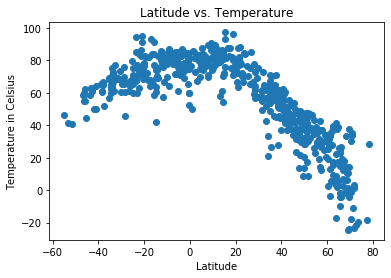

In [8]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature in Celsius')
plt.title('Latitude vs. Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

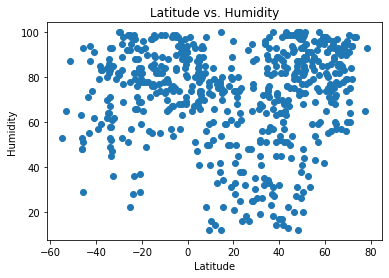

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

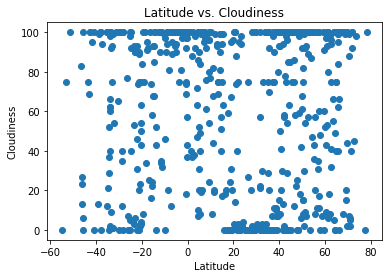

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

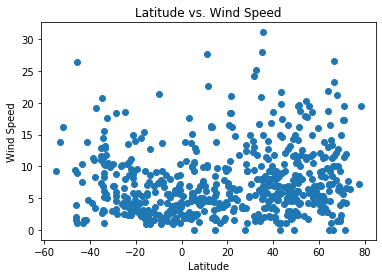

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


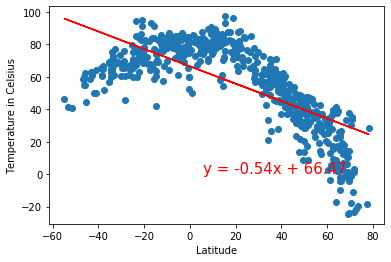

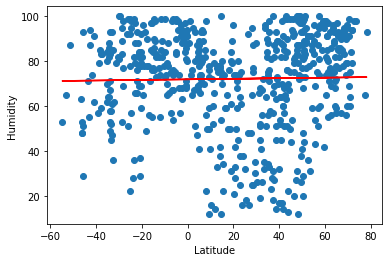

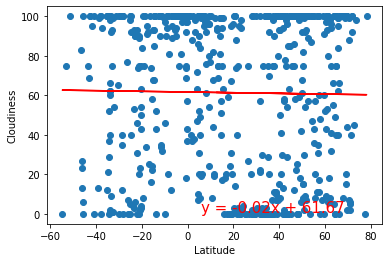

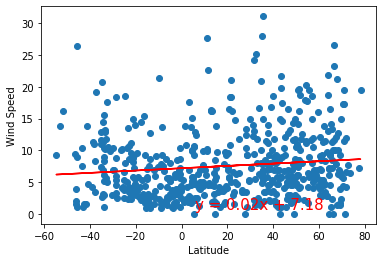

In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature in Celsius')
plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barsovo,61.1667,73.1667,-3.87,80,6,9.04,RU,1680836834
3,lompoc,34.6391,-120.4579,54.01,82,0,10.00,US,1680836820
8,bonavista,48.6499,-53.1147,29.50,87,98,11.63,CA,1680836836
9,thompson,55.7435,-97.8558,28.56,43,20,5.75,CA,1680836423
11,barrow,71.2906,-156.7887,-11.18,84,40,0.00,US,1680836794


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,62.42,85,37,11.36,ZA,1680836834
2,hermanus,-34.4187,19.2345,64.80,88,29,14.43,ZA,1680836834
4,luderitz,-26.6481,15.1594,61.11,92,77,10.00,NaN,1680836835
5,busselton,-33.6500,115.3333,72.21,45,92,13.20,AU,1680836796
6,mwingi,-0.9344,38.0601,65.57,86,74,3.89,KE,1680836835


###  Temperature vs. Latitude Linear Regression Plot

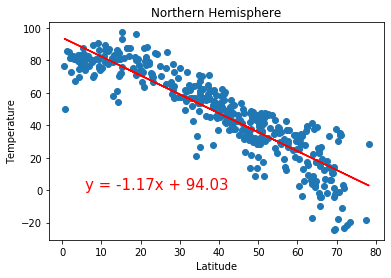

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere')
plt.show()

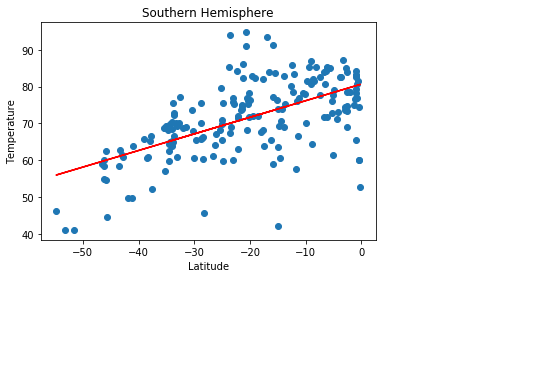

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative correlation between latitude and temperature. This means that the higher the latitude, the lower the temperature which makes sense because generally, the closer to the equator, the warmer the city will be. . The opposite is true in the Southern Hemisphere, where there is a weak positive correlation between latitude and temperature - the negative latitudes have a lower temperature. There are far more outliers in the Southern Hemisphere than the Northern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

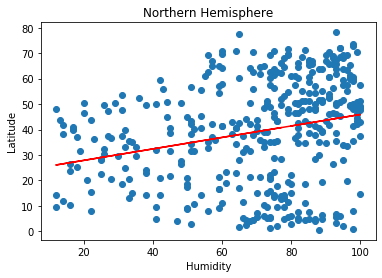

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere')
plt.show()

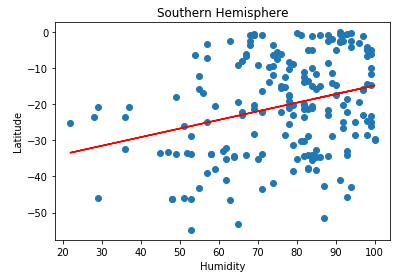

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** There does not appear to be any correlation between Humidity and Latitude in either the Northern or Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

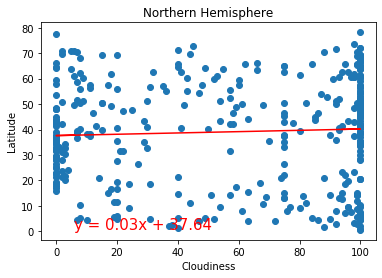

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere')
plt.show()

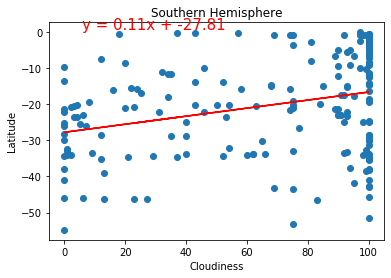

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** There does not appear to be any correlation between Cloudiness and Latitude in either the Northern or Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

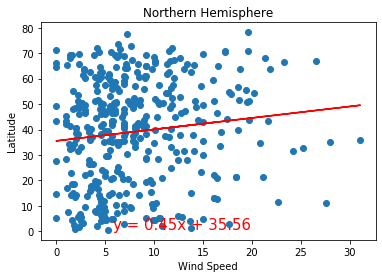

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere')
plt.show()

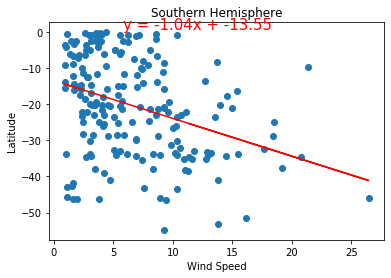

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** There does not appear to be any correlation between Wind Speed and Latitude in either the Northern or Southern Hemisphere.